In [1]:
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
df = pd.read_csv("C:\\Users\\sagar\\Downloads\\Real estate.csv", index_col = 'No')

In [3]:
df.head()

,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
No,,,,,,
1,32.0,84.87882,10,24.98298,121.54024,37.9
2,19.5,306.59470,9,24.98034,121.53951,42.2
3,13.3,561.98450,5,24.98746,121.54391,47.3
4,13.3,561.98450,5,24.98746,121.54391,54.8
5,5.0,390.56840,5,24.97937,121.54245,43.1


# EDA

In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 414 entries, 1 to 414
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   house age                            414 non-null    float64
 1   distance to the nearest MRT station  414 non-null    float64
 2   number of convenience stores         414 non-null    int64  
 3   latitude                             414 non-null    float64
 4   longitude                            414 non-null    float64
 5   house price of unit area             414 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 22.6 KB


In [5]:
df.describe()

,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


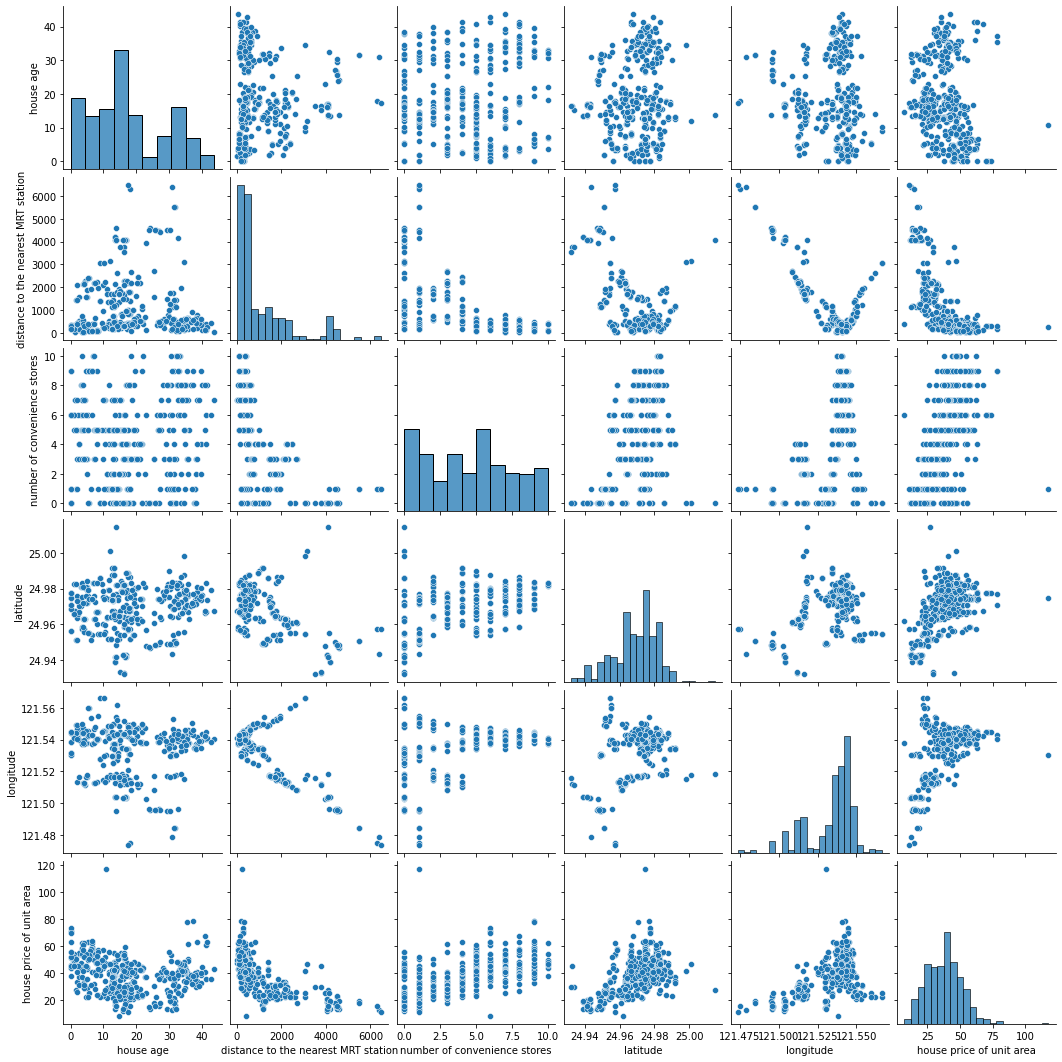

In [6]:

sns.pairplot(df)

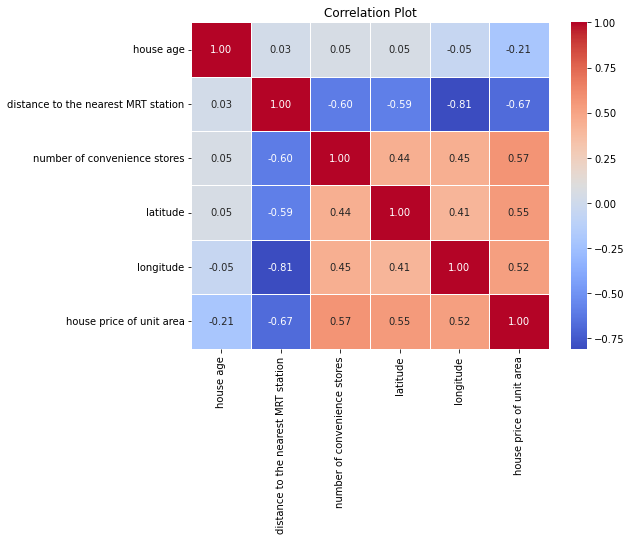

In [7]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Plot')
plt.show()

<Figure size 360x360 with 0 Axes>

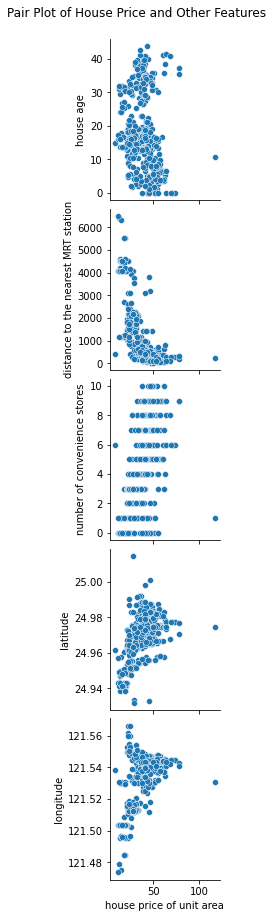

In [8]:
columns_for_pair_plot = ['house age', 'distance to the nearest MRT station', 'number of convenience stores', 'latitude', 'longitude', 'house price of unit area']
plt.figure(figsize=(5, 5))
sns.pairplot(df[columns_for_pair_plot], x_vars=['house price of unit area'], y_vars=columns_for_pair_plot[:-1], kind='scatter', corner = True)
plt.suptitle('Pair Plot of House Price and Other Features', y=1.02)
plt.show()

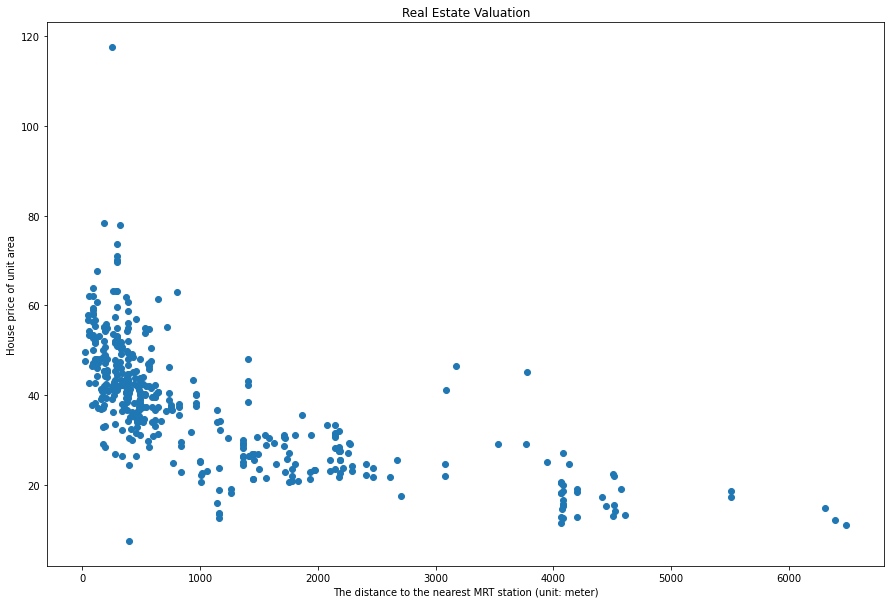

In [9]:
plt.figure(figsize=(15,10))
plt.scatter(x=df['distance to the nearest MRT station'], y=df['house price of unit area'])
plt.xlabel('The distance to the nearest MRT station (unit: meter)')
plt.ylabel('House price of unit area')
plt.title('Real Estate Valuation')
plt.show()


# 1. Simple Multiple Linear Regression

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
y = df['house price of unit area']
x = df.drop(['house price of unit area'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, f1_score, precision_score, recall_score

In [13]:
x.describe()

,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude
count,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361
std,11.392485,1262.109595,2.945562,0.012410,0.015347
min,0.000000,23.382840,0.000000,24.932070,121.473530
25%,9.025000,289.324800,1.000000,24.963000,121.528085
50%,16.100000,492.231300,4.000000,24.971100,121.538630
75%,28.150000,1454.279000,6.000000,24.977455,121.543305
max,43.800000,6488.021000,10.000000,25.014590,121.566270


In [14]:
import numpy as np
np.random.seed(42)
model = LinearRegression()

model.fit(X_train, y_train)


y_train_pred = model.predict(X_train)


y_test_pred = model.predict(X_test)


train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f'Training Mean Squared Error: {train_mse}')
print(f'Testing Mean Squared Error: {test_mse}')
print(f'R-squared: {r2}')


Training Mean Squared Error: 85.43289947763155
Testing Mean Squared Error: 54.580945200862416
R-squared: 0.6746481382828159


C:\Users\sagar\miniconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\sagar\miniconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\sagar\miniconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


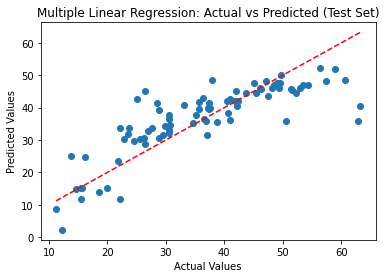

In [15]:
plt.scatter(y_test, y_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='y=x')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Multiple Linear Regression: Actual vs Predicted (Test Set)')
plt.show()

# 2. Using backward selection to select features then performing regularization using ridge regression

In [16]:
import statsmodels.api as sm
from sklearn.linear_model import Ridge

Dropped Features: []
Training Mean Squared Error: 90.90560177285263
Testing Mean Squared Error: 54.580945200862416
R-squared: 0.6506806878281703


C:\Users\sagar\miniconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\sagar\miniconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\sagar\miniconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


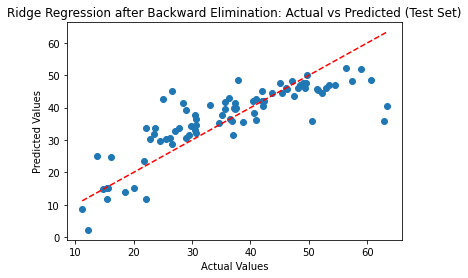

In [17]:

X = sm.add_constant(x)



alpha = 1.0

dropped_features = []
while True:
    model = sm.OLS(y_train, X_train).fit()
    if 'const' in model.pvalues.index:
        max_pvalue = model.pvalues.drop('const').max()
    else:
        max_pvalue = 0  # Set to a low value if 'const' is not present
    
    if max_pvalue > 0.05:
        feature_to_remove = model.pvalues.idxmax()
        X_train = X_train.drop(feature_to_remove, axis=1)
        dropped_features.append(feature_to_remove)
        X_test = X_test.drop(feature_to_remove, axis=1)
    else:
        break

print("Dropped Features:", dropped_features)

ridge_model = Ridge(alpha=alpha, random_state = 42)
ridge_model.fit(X_train, y_train)


y_test_pred2 = ridge_model.predict(X_test)
y_train_pred = ridge_model.predict(X_train)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred2)

print(f'Training Mean Squared Error: {train_mse}')
print(f'Testing Mean Squared Error: {test_mse}')
print(f'R-squared: {r2}')



plt.scatter(y_test, y_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='y=x')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Ridge Regression after Backward Elimination: Actual vs Predicted (Test Set)')
plt.show()

# 3. Random Forests

In [18]:
from sklearn.ensemble import RandomForestRegressor

C:\Users\sagar\miniconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\sagar\miniconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


Training Mean Squared Error: 90.90560177285263
Testing Mean Squared Error: 34.60981792762854
R-squared: 0.7936941426168487


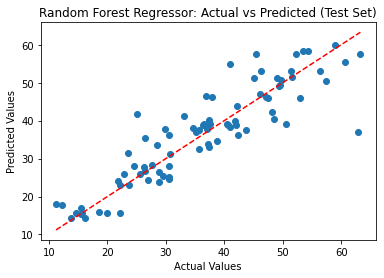

In [19]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


rf_model.fit(X_train, y_train)

y_test_pred = rf_model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f'Training Mean Squared Error: {train_mse}')
print(f'Testing Mean Squared Error: {test_mse}')
print(f'R-squared: {r2}')



plt.scatter(y_test, y_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='y=x')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regressor: Actual vs Predicted (Test Set)')
plt.show()